In [1]:
#calling various library
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
fig = plt.figure()


In [2]:
                                                                  # no of points we want in the msd plot
x_arr = np.loadtxt('Desktop/01.txt')                                      #all elements are in micron
y_arr = np.loadtxt('Desktop/02.txt')                                       #all elements are in micron
t_arr = np.loadtxt('Desktop/03.txt')


In [3]:
len(x_arr)

41063

In [4]:
import pandas as pd
df=pd.DataFrame(t_arr)
df

,0
0,3.248450e+03
1,3.248450e+03
2,3.359028e+03
3,3.359090e+03
4,3.359090e+03
5,1.025704e+04
6,1.040175e+04
7,1.072007e+04
8,1.072007e+04
9,1.183783e+04


In [5]:
pd.DataFrame.describe(df)

,0
count,4.086800e+04
mean,7.543930e+06
std,4.294406e+06
min,2.708004e+01
25%,3.864338e+06
50%,7.616364e+06
75%,1.129560e+07
max,1.500166e+07


In [5]:
dt_min=1e-8                                                                   #initial time step
dt_max=1e4                                                                   #final time step in msd graph
msd_xarr=[]                                                                    #mean squared x
msd_yarr=[]                                                                    #mean squared y
msd_rarr=[]                                                                    #r is the msd array
mean_t_arr=[]                                                                  #dtarray for msd plot

N = 40   
timelaglog= np.logspace( np.log10(1e-8), np.log10(1e6), num=N ) #nonzero points for msd plot(distributed linearly in log scale)
counterarray=[]                                                                 #no of data averaging for particular dt


In [6]:
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')

for m in range(0,len(timelaglog)-1):
    print(m)
    r=0 
    x=0
    y=0 
    count=0                                                                   #counter no of elements for data avraging for particular dt
    for i in range(len(t_arr)):
        for j in range(i+1,len(t_arr)):
            timelag = t_arr[j]-t_arr[i]                                       #time difference between i'th and j'th elements
            if timelag >= timelaglog[m] and timelag <= timelaglog[m+1]:
                x = x+((x_arr[j]-x_arr[i])**2)
                y = y+((y_arr[j]-y_arr[i])**2)
                count = count+1
    print('no. of  points in bin',count) 
    x=float(x/count)
    y=float(y/count)
    r=float(x+y) 
    msd_xarr.append(x)
    msd_yarr.append(y)                                                          #msd for a particual dt
    msd_rarr.append(r)
    mean_t_arr.append(np.sqrt(timelaglog[m]*timelaglog[m+1]))
    print( 'tau=', np.sqrt(timelaglog[m]*timelaglog[m+1]) )
    counterarray.append(count)

    
time2=datetime.now().strftime('%Y-%m-%d %H:%M:%S') # final time ending of the run time
print(time1)
print(time2) 

0
no. of  points in bin 1250
tau= 1.5117750706156618e-08
1
no. of  points in bin 1282
tau= 3.4551072945922184e-08
2
no. of  points in bin 1448
tau= 7.896522868499725e-08
3
no. of  points in bin 1521
tau= 1.80472176682717e-07
4
no. of  points in bin 1593
tau= 4.124626382901352e-07
5
no. of  points in bin 1779
tau= 9.426684551178843e-07
6
no. of  points in bin 1896
tau= 2.1544346900318822e-06
7
no. of  points in bin 2175
tau= 4.923882631706742e-06
8
no. of  points in bin 2156
tau= 1.1253355826007658e-05
9
no. of  points in bin 2457
tau= 2.5719138090593443e-05
10
no. of  points in bin 2626
tau= 5.878016072274912e-05
11
no. of  points in bin 2847
tau= 0.00013433993325989
12
no. of  points in bin 3081
tau= 0.00030702906297578496
13
no. of  points in bin 3197
tau= 0.000701703828670383
14
no. of  points in bin 3772
tau= 0.001603718743751331
15
no. of  points in bin 4261
tau= 0.00366524123707963
16
no. of  points in bin 4517
tau= 0.008376776400682915
17
no. of  points in bin 5267
tau= 0.019144

In [9]:
print(mean_t_arr)

[1.5117750706156618e-08, 3.4551072945922184e-08, 7.896522868499725e-08, 1.80472176682717e-07, 4.124626382901352e-07, 9.426684551178843e-07, 2.1544346900318822e-06, 4.923882631706742e-06, 1.1253355826007658e-05, 2.5719138090593443e-05, 5.878016072274912e-05, 0.00013433993325989, 0.00030702906297578496, 0.000701703828670383, 0.001603718743751331, 0.00366524123707963, 0.008376776400682915, 0.019144819761699575, 0.043754793750741844, 0.1, 0.2285463864134991, 0.5223345074266843, 1.1937766417144382, 2.7283333764867694, 6.235507341273912, 14.251026703029991, 32.57020655659783, 74.43803013251681, 170.1254279852589, 388.8155180308093, 888.6238162743407, 2030.9176209047348, 4641.588833612782, 10608.183551394482, 24244.62017082326, 55410.203300094916, 126638.01734674048, 289426.61247167515, 661474.0641230146]


In [12]:
np.savetxt('msd_x_aniso_long.txt',msd_xarr)
np.savetxt('msd_y_aniso_long.txt',msd_yarr)
np.savetxt('msd_r_aniso_long.txt',msd_rarr)
np.savetxt('t_arr_formsd_aniso_long.txt',mean_t_arr)
np.savetxt('counterarray_aniso_long.txt',counterarray)


In [6]:
msd_r_iso = np.loadtxt('msd_r_iso.txt')   

In [7]:
msd_rarr = np.array(msd_rarr)
msd_xarr = np.array(msd_xarr)
msd_yarr = np.array(msd_yarr)

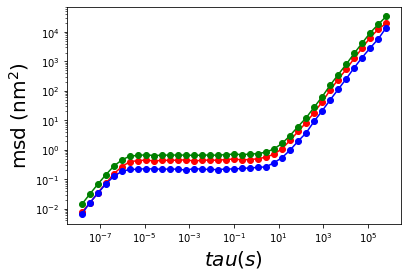

In [8]:

plt.plot(mean_t_arr,msd_xarr*1e18,'ro-')
plt.plot(mean_t_arr,msd_yarr*1e18,'bo-')
plt.plot(mean_t_arr,msd_rarr*1e18,'go-')

plt.ylabel('msd (nm$^2$)',size=20)
plt.xlabel(r'$tau (s)$', size =20)
plt.xscale('log')
plt.yscale('log')


plt.show()


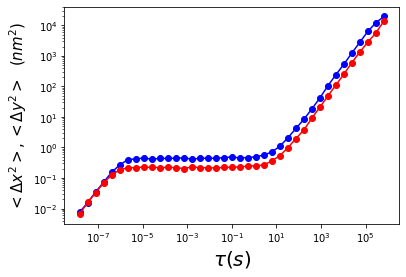

In [12]:
plt.plot(mean_t_arr,msd_xarr*1e18,'bo-')
plt.plot(mean_t_arr,msd_yarr*1e18,'ro-')
plt.ylabel(r'$<\Delta x^2>,<\Delta y^2> \ \  (nm^2)$',size=15)
plt.xlabel(r'$\tau  (s)$',size=20)

plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,6))
plt.ticklabel_format(style='sci', axis='y', scilimits=(-8,6))

plt.xscale('log')
plt.yscale('log')
plt.savefig('mvm_aniso_x_y_long.png')

plt.show()


In [11]:
import numpy
a = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])
index = ['time', 'msd_r', 'msd_x', 'msd_y']

import pandas as pd
df_a = pd.DataFrame(a, index)
df_a_tp = pd.DataFrame.transpose(df_a)

numpy.savetxt("mvm_vts_aniso_long.csv", df_a_tp, delimiter=",")
df_a_tp.to_csv('mvm_vts_aniso_long_final')

In [ ]:
msd_r_iso = np.loadtxt('msd_r_iso.txt')   